In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data__set = pd.read_csv('/content/Gold Price Prediction Dataset.csv')
data__set.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend
0,15-12-11,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,A,105.09,104.88,106.50,104.88,14330,A
1,16-12-11,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,A,103.35,103.51,104.56,102.46,140080,B
2,19-12-11,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,B,103.64,103.63,104.57,102.37,147880,A
3,20-12-11,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,A,106.73,104.30,107.27,103.91,170240,A
4,21-12-11,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,NaN,NaN,122.750000,124.169998,107.838242,B,107.71,107.15,108.17,106.16,145090,A


In [48]:
data__set.shape
data__set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1718 non-null   object 
 1   Open        1718 non-null   float64
 2   High        1718 non-null   float64
 3   Low         1718 non-null   float64
 4   Close       1718 non-null   float64
 5   Adj Close   1718 non-null   float64
 6   Volume      1718 non-null   int64  
 7   SP_open     1697 non-null   float64
 8   SP_high     1697 non-null   float64
 9   SP_low      1718 non-null   float64
 10  SP_close    1718 non-null   float64
 11  SP_Ajclose  1718 non-null   float64
 12  EU_Trend    1718 non-null   object 
 13  OF_Price    1718 non-null   float64
 14  OF_Open     1718 non-null   float64
 15  OF_High     1718 non-null   float64
 16  OF_Low      1718 non-null   float64
 17  OF_Volume   1718 non-null   int64  
 18  OF_Trend    1718 non-null   object 
dtypes: float64(14), int64(2), o

In [49]:
data__set.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
SP_open,21
SP_high,21
SP_low,0


In [50]:
data__set.fillna(method='ffill', inplace=True)
print(data__set.isnull().sum())

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
SP_open       0
SP_high       0
SP_low        0
SP_close      0
SP_Ajclose    0
EU_Trend      0
OF_Price      0
OF_Open       0
OF_High       0
OF_Low        0
OF_Volume     0
OF_Trend      0
dtype: int64


<ipython-input-50-f6867a39210a>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data__set.fillna(method='ffill', inplace=True)


In [51]:

laabel_encoder = LabelEncoder()
data__set['Date'] = laabel_encoder.fit_transform(data__set['Date'])

data__set['EU_Trend'] = laabel_encoder.fit_transform(data__set['EU_Trend'])
data__set['OF_Trend'] = laabel_encoder.fit_transform(data__set['OF_Trend'])
data__set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1718 non-null   int64  
 1   Open        1718 non-null   float64
 2   High        1718 non-null   float64
 3   Low         1718 non-null   float64
 4   Close       1718 non-null   float64
 5   Adj Close   1718 non-null   float64
 6   Volume      1718 non-null   int64  
 7   SP_open     1718 non-null   float64
 8   SP_high     1718 non-null   float64
 9   SP_low      1718 non-null   float64
 10  SP_close    1718 non-null   float64
 11  SP_Ajclose  1718 non-null   float64
 12  EU_Trend    1718 non-null   int64  
 13  OF_Price    1718 non-null   float64
 14  OF_Open     1718 non-null   float64
 15  OF_High     1718 non-null   float64
 16  OF_Low      1718 non-null   float64
 17  OF_Volume   1718 non-null   int64  
 18  OF_Trend    1718 non-null   int64  
dtypes: float64(14), int64(5)
me

In [52]:
data__set.drop_duplicates(inplace=True)


print(f"Nmbr of similar rows: {data__set.duplicated().sum()}")

Nmbr of similar rows: 0


In [53]:
data__set = pd.get_dummies(data__set, columns=['EU_Trend', 'OF_Trend'], drop_first=True)


print(data__set.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'EU_Trend_1',
       'OF_Trend_1'],
      dtype='object')


In [54]:
from sklearn.preprocessing import StandardScaler


numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose','OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'EU_Trend_1',
       'OF_Trend_1']


scaler = StandardScaler()


data__set[numerical_columns] = scaler.fit_transform(data__set[numerical_columns])


print(data__set[numerical_columns].head())

       Open      High       Low     Close    Volume   SP_open   SP_high  \
0  1.564704  1.537256  1.433596  1.426632  2.658016 -1.852080 -1.863986   
1  1.540163  1.561084  1.559519  1.592051  1.967348 -1.870285 -1.869661   
2  1.606936  1.588884  1.585969  1.571516  0.833630 -1.874153 -1.883961   
3  1.683413  1.677956  1.713618  1.691874  0.140258 -1.871423 -1.842650   
4  1.692543  1.683630  1.687744  1.702141  0.721601 -1.871423 -1.842650   

     SP_low  SP_close  SP_Ajclose  OF_Price   OF_Open   OF_High    OF_Low  \
0 -1.868930 -1.880786   -1.788933  1.007037  1.000004  1.026647  1.035555   
1 -1.884753 -1.894268   -1.785710  0.943516  0.949928  0.955806  0.946959   
2 -1.913878 -1.923972   -1.808989  0.954103  0.954314  0.956172  0.943664   
3 -1.906081 -1.840800   -1.743809  1.066906  0.978804  1.054765  1.000044   
4 -1.851501 -1.835316   -1.739510  1.102682  1.082978  1.087629  1.082416   

   OF_Volume  EU_Trend_1  OF_Trend_1  
0  -2.382704   -1.010533   -1.002331  
1  -0.96

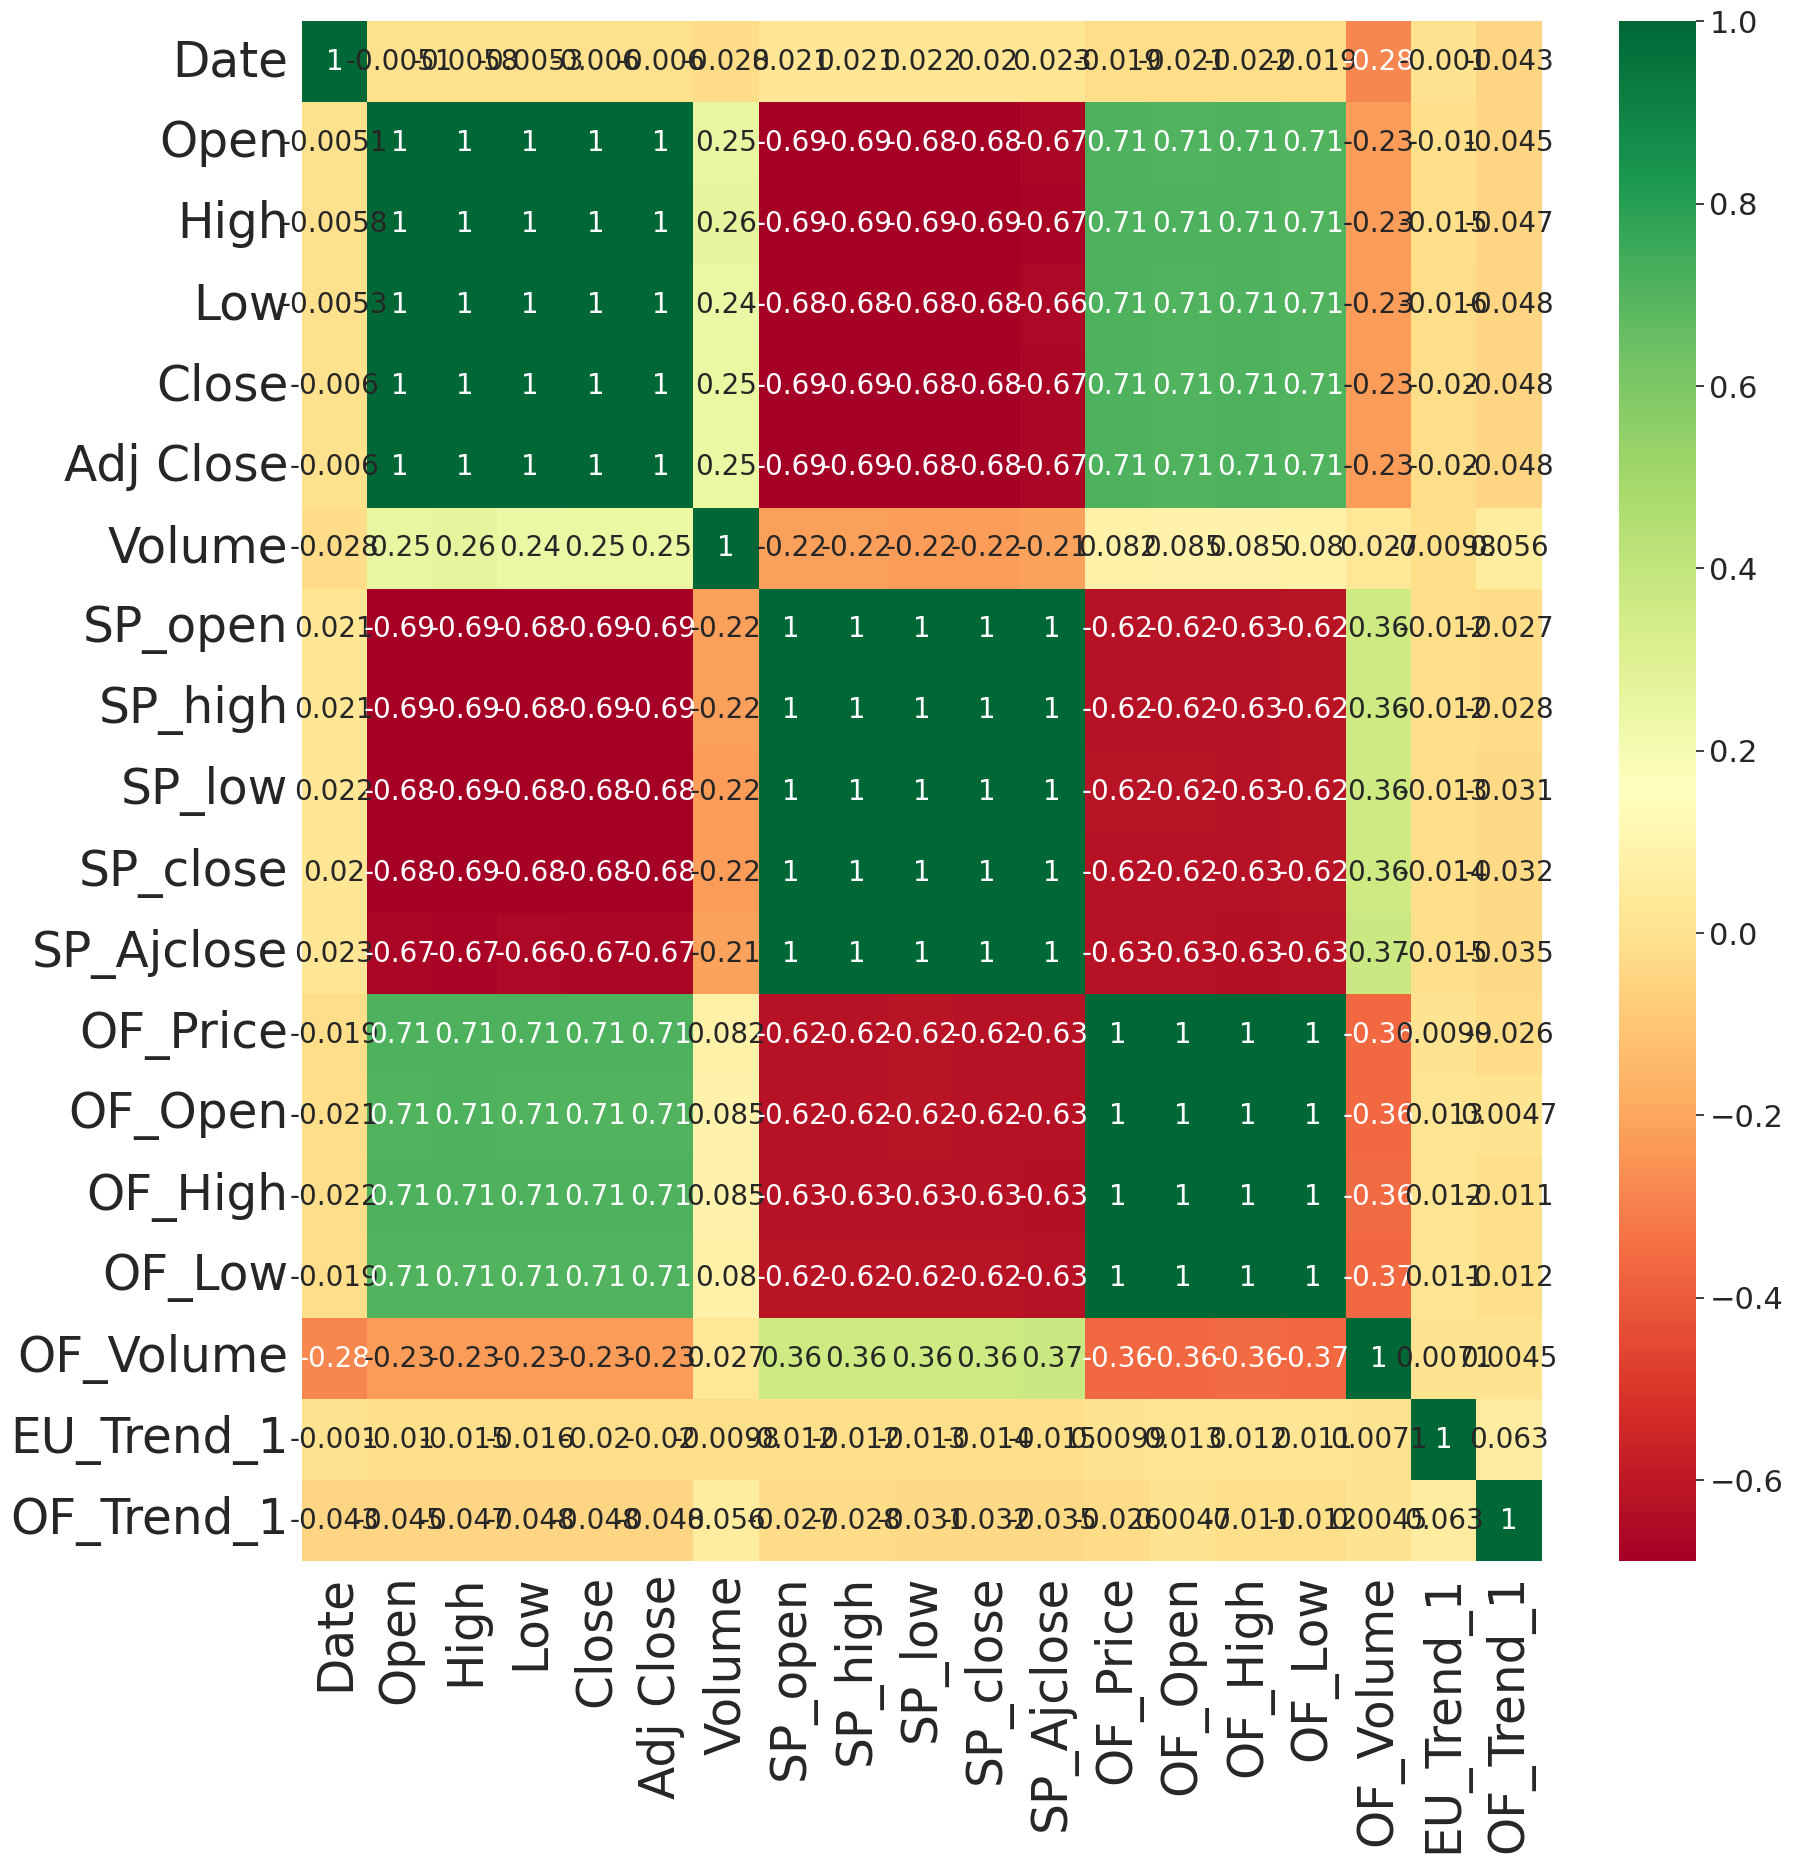

In [55]:
sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
heatt_plott= sns.heatmap(data__set.corr(method='pearson'), annot=True, cmap= 'RdYlGn', annot_kws={'size': 20})

plt.yticks(fontsize=35)
plt.xticks(fontsize=35)

plt.show()

In [56]:
correlationss = data__set.corr(method='pearson')
print(correlationss['SP_open'].sort_values(ascending=False).to_string())

SP_open       1.000000
SP_high       0.999788
SP_low        0.999528
SP_close      0.999347
SP_Ajclose    0.998195
OF_Volume     0.363967
Date          0.021385
EU_Trend_1   -0.012214
OF_Trend_1   -0.026860
Volume       -0.218532
OF_Low       -0.621368
OF_Price     -0.623787
OF_Open      -0.623806
OF_High      -0.626292
Low          -0.681780
Open         -0.685171
Close        -0.685493
Adj Close    -0.685493
High         -0.688982


In [66]:
columns_to_drop = ['EU_Trend_1', 'OF_Trend_1']
existing_columns = data__set.columns

for column in columns_to_drop:
    if column in existing_columns:
        data__set = data__set.drop(columns=column)
    else:
        print(f"Column '{column}' not found in DataFrame")

data__set.info()

Column 'EU_Trend_1' not found in DataFrame
Column 'OF_Trend_1' not found in DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              1718 non-null   float64
 1   High              1718 non-null   float64
 2   Low               1718 non-null   float64
 3   Close             1718 non-null   float64
 4   Adj Close         1718 non-null   float64
 5   Volume            1718 non-null   float64
 6   SP_open           1718 non-null   float64
 7   SP_high           1718 non-null   float64
 8   SP_low            1718 non-null   float64
 9   SP_close          1718 non-null   float64
 10  SP_Ajclose        1718 non-null   float64
 11  OF_Price          1718 non-null   float64
 12  OF_Open           1718 non-null   float64
 13  OF_High           1718 non-null   float64
 14  OF_Low            1718 non-null   float64
 15  OF_

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X = data__set.drop(['Adj Close'], axis=1)
y = data__set['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linr_regg = LinearRegression()
linr_regg.fit(X_train, y_train)
y_prdt = linr_regg.predict(X_test)
m_s_e = mean_squared_error(y_test, y_prdt)
print("Mean Squared Error:", m_s_e)

Mean Squared Error: 4.972392087234955e-28


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

thrsld = data__set['Adj Close'].mean()
data__set['Adj_Close_Binary'] = (data__set['Adj Close'] > thrsld).astype(int)

X = data__set.drop(['Adj Close', 'Adj_Close_Binary'], axis=1)
y = data__set['Adj_Close_Binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

l_regg = LogisticRegression()
l_regg.fit(X_train, y_train)

y_prdt = l_regg.predict(X_test)
accuracyy = accuracy_score(y_test, y_prdt)
print("Accuracy:", accuracyy)

Accuracy: 0.9593023255813954
